How can we group the customer feedbacks.
TripAdvisor, Inc. is an American travel and restaurant website company that shows hotel and restaurant reviews, accommodation bookings and other travel-related content.It also includes interactive travel forums.

Headquartered in Needham, Massachusetts, TripAdvisor is the largest travel website in the world, with more than 315 million reviewers (active and inactive) and over 500 million reviews of hotels, restaurants, attractions and other travel-related businesses. TripAdvisor was an early adopter of user-generated content. The website services are free to users, who provide most of the content, and the website is supported by a hotel booking facility and an advertising business model.

This data set is populated by crawling TripAdvisor.com.

Reviews on destinations in 10 categories mentioned across East Asia are considered.

Each traveler rating is mapped as

Excellent (4)

Very Good (3) 

Average (2)

Poor (1) 

Terrible (0) 

And average rating is used against each category per user.

All of us that use Trip Advisor gets good advice on where we can eat, sleep, go on adventure etc. So you are helping others get a good experience around the world which is a great benefit! Besides that the feeling of knowing that you've help others is always nice, which is why I often review restaurants on Trip Advisor.

Now the company wants to use this data to undestand who are having similar reviews on the following categories. Can we help them?

Attribute Information:
Attribute 1 : Unique user id

Attribute 2 : Average user feedback on art galleries

Attribute 3 : Average user feedback on dance clubs

Attribute 4 : Average user feedback on juice bars

Attribute 5 : Average user feedback on restaurants

Attribute 6 : Average user feedback on museums

Attribute 7 : Average user feedback on resorts

Attribute 8 : Average user feedback on parks/picnic spots

Attribute 9 : Average user feedback on beaches

Attribute 10 : Average user feedback on theaters

Attribute 11 : Average user feedback on religious institutions

Step 1:
Load the dataset

In [2]:
import pandas as pd

trip_advi_df = pd.read_csv(r'C:\Users\40101464\Desktop\PPT-20190507\Clustering-20190708\Case Studies with Solution\Case 2\tripadvisor_review.csv')

# Make names in good format
trip_advi_df.columns = trip_advi_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

user_id = trip_advi_df['user_id']

# forget about the users for the moment - we'll use this later
del trip_advi_df['user_id']

Step 2:
Display the DataFrame to inspect the data. Notice that there are 7 columns

In [3]:
trip_advi_df

,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,category_10
0,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
5,0.99,1.28,0.72,0.27,0.74,1.26,3.17,2.89,1.66,3.66
6,0.90,1.36,0.26,0.32,0.86,1.58,3.17,2.66,1.22,3.22
7,0.74,1.40,0.22,0.41,0.82,1.50,3.17,2.81,1.54,2.88
8,1.12,1.76,1.04,0.64,0.82,2.14,3.18,2.79,1.41,2.54
9,0.70,1.36,0.22,0.26,1.50,1.54,3.17,2.82,2.24,3.12


Step 3:
Extract the measurements from the DataFrame using its .values attribute:

In [4]:
samples = trip_advi_df.values

Step 3:
Measure the quality of clusterings with different numbers of clusters using the inertia. For each of the given values of k, perform the following steps:

Create a KMeans instance called model with k clusters.

Fit the model to the grain data samples.

Append the value of the inertia_ attribute of model to the list inertias.

In [5]:
from sklearn.cluster import KMeans

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

In [6]:
model.inertia_

891.0084961276307

Step 5:
Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!

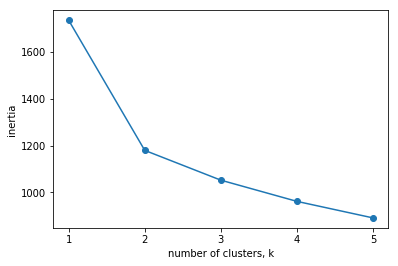

In [8]:
import matplotlib.pyplot as plt
% matplotlib inline
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [9]:
model = KMeans(n_clusters=3)

In [10]:
# Derive cluster labels

labels = model.fit_predict(samples)

trip_advi_df['label'] = labels

In [11]:
#Check how many users are similar

trip_advi_df.label.value_counts()

2    413
0    290
1    277
Name: label, dtype: int64

To implement the vizualization we need to have PCA of data to 2 dimention then only we can see in 2 D

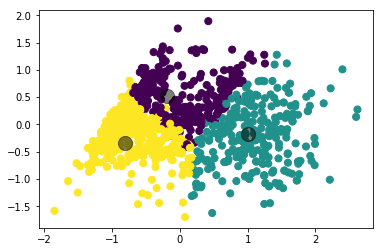

In [12]:
# Following code is for ploting the Kmeans Clustering

# Here we have done an advance modeling called PCA to plot in 2D as we can not plot in more than 3D

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(samples)
pca_d = pca.transform(samples)

plt.scatter(pca_d[:, 0], pca_d[:, 1], c=labels, s=50, cmap='viridis')
centers = model.cluster_centers_

pca = PCA(n_components=2).fit(centers)
pca_c = pca.transform(centers)
plt.scatter(pca_c[:, 0], pca_c[:, 1], c='black', s=200, alpha=0.5);

# Now the task is to understand what is happening, can you take some rows of similar reviews and see how they are rating for all 
# and make some insights from it